# Healthcare

## データ解析
### 手順メモ
1. データを読み込む
2. データをサンプルごとに分割する
3. デシリアライズするなどして，pythonに取り込む
4. csvファイルに書き込む
5. 各ポイントのデータをグラフ化する
6. 全身のボーンをつないだグラフを描画する
7. 時間を指定することでリアルタイムで変化を確認できるようにする

#### 初期設定

In [13]:
import csv
import json
import os
from logging import DEBUG, StreamHandler, getLogger
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from setuptools import glob

logger = getLogger(__name__)
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)
logger.propagate = False

CURRENT_DIR = %pwd

DATA_LABELS = [
    'time',
    'Root_x', 'Root_y', 'Root_z',
    'Hips_x','Hips_y', 'Hips_z',
    'LeftUpLeg_x', 'LeftUpLeg_y', 'LeftUpLeg_z',
    'LeftLeg_x', 'LeftLeg_y', 'LeftLeg_z',
    'LeftFoot_x', 'LeftFoot_y', 'LeftFoot_z',
    'LeftToes_x', 'LeftToes_y', 'LeftToes_z',
    'LeftToesEnd_x', 'LeftToesEnd_y', 'LeftToesEnd_z',
    'RightUpLeg_x', 'RightUpLeg_y', 'RightUpLeg_z',
    'RightLeg_x',    'RightLeg_y',    'RightLeg_z',
    'RightFoot_x', 'RightFoot_y', 'RightFoot_z',
    'RightToes_x', 'RightToes_y', 'RightToes_z',
    'RightToesEnd_x', 'RightToesEnd_y', 'RightToesEnd_z',
    'Spine1_x', 'Spine1_y', 'Spine1_z',
    'Spine2_x', 'Spine2_y', 'Spine2_z',
    'Spine3_x', 'Spine3_y', 'Spine3_z',
    'Spine4_x', 'Spine4_y', 'Spine4_z',
    'Spine5_x', 'Spine5_y', 'Spine5_z',
    'Spine6_x', 'Spine6_y', 'Spine6_z',
    'Spine7_x', 'Spine7_y', 'Spine7_z',
    'LeftShoulder1_x', 'LeftShoulder1_y', 'LeftShoulder1_z',
    'LeftArm_x', 'LeftArm_y', 'LeftArm_z',
    'LeftForearm_x', 'LeftForearm_y', 'LeftForearm_z',
    'LeftHand_x', 'LeftHand_y', 'LeftHand_z',
    'LeftHandIndexStart_x', 'LeftHandIndexStart_y', 'LeftHandIndexStart_z',
    'LeftHandIndex1_x', 'LeftHandIndex1_y', 'LeftHandIndex1_z',
    'LeftHandIndex2_x', 'LeftHandIndex2_y', 'LeftHandIndex2_z',
    'LeftHandIndex3_x', 'LeftHandIndex3_y', 'LeftHandIndex3_z',
    'LeftHandIndexEnd_x', 'LeftHandIndexEnd_y', 'LeftHandIndexEnd_z',
    'LeftHandMidStart_x', 'LeftHandMidStart_y', 'LeftHandMidStart_z',
    'LeftHandMid1_x', 'LeftHandMid1_y', 'LeftHandMid1_z',
    'LeftHandMid2_x', 'LeftHandMid2_y', 'LeftHandMid2_z',
    'LeftHandMid3_x', 'LeftHandMid3_y', 'LeftHandMid3_z',
    'LeftHandMidEnd_x', 'LeftHandMidEnd_y', 'LeftHandMidEnd_z',
    'LeftHandPinkyStart_x', 'LeftHandPinkyStart_y', 'LeftHandPinkyStart_z',
    'LeftHandPinky1_x', 'LeftHandPinky1_y', 'LeftHandPinky1_z',
    'LeftHandPinky2_x', 'LeftHandPinky2_y', 'LeftHandPinky2_z',
    'LeftHandPinky3_x', 'LeftHandPinky3_y', 'LeftHandPinky3_z',
    'LeftHandPinkyEnd_x', 'LeftHandPinkyEnd_y', 'LeftHandPinkyEnd_z',
    'LeftHandRingStart_x', 'LeftHandRingStart_y', 'LeftHandRingStart_z',
    'LeftHandRing1_x', 'LeftHandRing1_y', 'LeftHandRing1_z',
    'LeftHandRing2_x', 'LeftHandRing2_y', 'LeftHandRing2_z',
    'LeftHandRing3_x', 'LeftHandRing3_y', 'LeftHandRing3_z',
    'LeftHandRingEnd_x', 'LeftHandRingEnd_y', 'LeftHandRingEnd_z',
    'LeftHandThumbStart_x', 'LeftHandThumbStart_y', 'LeftHandThumbStart_z',
    'LeftHandThumb1_x', 'LeftHandThumb1_y', 'LeftHandThumb1_z',
    'LeftHandThumb2_x', 'LeftHandThumb2_y', 'LeftHandThumb2_z',
    'LeftHandThumbEnd_x', 'LeftHandThumbEnd_y', 'LeftHandThumbEnd_z',
    'Neck1_x', 'Neck1_y', 'Neck1_z',
    'Neck2_x', 'Neck2_y', 'Neck2_z',
    'Neck3_x', 'Neck3_y', 'Neck3_z',
    'Neck4_x', 'Neck4_y', 'Neck4_z',
    'Head_x', 'Head_y', 'Head_z',
    'Jaw_x', 'Jaw_y', 'Jaw_z',
    'Chin_x', 'Chin_y', 'Chin_z',
    'LeftEye_x', 'LeftEye_y', 'LeftEye_z',
    'LeftEyeLowerLid_x', 'LeftEyeLowerLid_y', 'LeftEyeLowerLid_z',
    'LeftEyeUpperLid_x', 'LeftEyeUpperLid_y', 'LeftEyeUpperLid_z',
    'LeftEyeball_x', 'LeftEyeball_y', 'LeftEyeball_z',
    'Nose_x', 'Nose_y', 'Nose_z',
    'RightEye_x', 'RightEye_y', 'RightEye_z',
    'RightEyeLowerLid_x', 'RightEyeLowerLid_y', 'RightEyeLowerLid_z',
    'RightEyeUpperLid_x', 'RightEyeUpperLid_y', 'RightEyeUpperLid_z',
    'RightEyeball_x', 'RightEyeball_y', 'RightEyeball_z',
    'RightShoulder1_x', 'RightShoulder1_y', 'RightShoulder1_z',
    'RightArm_x',               'RightArm_y', 'RightArm_z',
    'RightForearm_x',           'RightForearm_y', 'RightForearm_z',
    'RightHand_x',              'RightHand_y', 'RightHand_z',
    'RightHandIndexStart_x',    'RightHandIndexStart_y', 'RightHandIndexStart_z',
    'RightHandIndex1_x',        'RightHandIndex1_y', 'RightHandIndex1_z',
    'RightHandIndex2_x',        'RightHandIndex2_y', 'RightHandIndex2_z',
    'RightHandIndex3_x',        'RightHandIndex3_y', 'RightHandIndex3_z',
    'RightHandIndexEnd_x',      'RightHandIndexEnd_y', 'RightHandIndexEnd_z',
    'RightHandMidStart_x',      'RightHandMidStart_y', 'RightHandMidStart_z',
    'RightHandMid1_x',          'RightHandMid1_y', 'RightHandMid1_z',
    'RightHandMid2_x',          'RightHandMid2_y', 'RightHandMid2_z',
    'RightHandMid3_x',          'RightHandMid3_y', 'RightHandMid3_z',
    'RightHandMidEnd_x',        'RightHandMidEnd_y','RightHandMidEnd_z',
    'RightHandPinkyStart_x',    'RightHandPinkyStart_y', 'RightHandPinkyStart_z',
    'RightHandPinky1_x',        'RightHandPinky1_y', 'RightHandPinky1_z',
    'RightHandPinky2_x',        'RightHandPinky2_y', 'RightHandPinky2_z',
    'RightHandPinky3_x',        'RightHandPinky3_y', 'RightHandPinky3_z',
    'RightHandPinkyEnd_x',      'RightHandPinkyEnd_y', 'RightHandPinkyEnd_z',
    'RightHandRingStart_x',     'RightHandRingStart_y', 'RightHandRingStart_z',
    'RightHandRing1_x',         'RightHandRing1_y', 'RightHandRing1_z',
    'RightHandRing2_x',         'RightHandRing2_y', 'RightHandRing2_z',
    'RightHandRing3_x',         'RightHandRing3_y', 'RightHandRing3_z',
    'RightHandRingEnd_x',       'RightHandRingEnd_y', 'RightHandRingEnd_z',
    'RightHandThumbStart_x',    'RightHandThumbStart_y', 'RightHandThumbStart_z',
    'RightHandThumb1_x',        'RightHandThumb1_y', 'RightHandThumb1_z',
    'RightHandThumb2_x',        'RightHandThumb2_y', 'RightHandThumb2_z',
    'RightHandThumbEnd_x',      'RightHandThumbEnd_y', 'RightHandThumbEnd_z'
]

def get_string_list_from_file_path(file_path):
    with open(file_path, "r", encoding='utf-8_sig') as f:
        string_list = f.readlines()
        print(string_list[0])

    return string_list


def get_obj_from_json_str(json_string):
    obj = json.loads(json_string)
    return obj


# ファイルがなければ作成し，csvファイルにログを書き込む
def save_log_to_csv(file_name, row):
    file_path = os.path.join('/data/csv', file_name)
    csv_path = CURRENT_DIR + file_path

    if not os.path.isfile(csv_path):
        with open(csv_path, mode='x') as f:
            writer = csv.writer(f)

            writer.writerow(DATA_LABELS)

    with open(csv_path, mode='a') as f:
        writer = csv.writer(f)
        writer.writerow(row)


In [4]:
data_folder_path = CURRENT_DIR + '/data/healthcare'
files = glob.glob(data_folder_path + '/*.json')

for file in files:
    logger.info(file)
    json_string_list = get_string_list_from_file_path(file)

    objs = []
    for s in json_string_list:
        objs.append(get_obj_from_json_str(s))

    row = []
    file_name = os.path.basename(file)
    csv_file_name = file_name + '.csv'

    for obj in objs:
        if not 'time' in obj: continue

        row.append(obj['time'])
        positions = obj['boneTransformData']['positions']
        for pos in positions:
            row.append(pos['x'])
            row.append(pos['y'])
            row.append(pos['z'])
        save_log_to_csv(csv_file_name, row)
        row = []

/Users/dai/Documents/Python/MachineLearnig/data/healthcare/log_2021_02_01_15_48_46.json
/Users/dai/Documents/Python/MachineLearnig/data/healthcare/log_2021_02_01_15_48_46.json
/Users/dai/Documents/Python/MachineLearnig/data/healthcare/log_2021_02_01_15_42_37.json
/Users/dai/Documents/Python/MachineLearnig/data/healthcare/log_2021_02_01_15_42_37.json
/Users/dai/Documents/Python/MachineLearnig/data/healthcare/log_2021_02_01_15_45_12.json
/Users/dai/Documents/Python/MachineLearnig/data/healthcare/log_2021_02_01_15_45_12.json
/Users/dai/Documents/Python/MachineLearnig/data/healthcare/log_2021_02_01_15_52_00.json
/Users/dai/Documents/Python/MachineLearnig/data/healthcare/log_2021_02_01_15_52_00.json
/Users/dai/Documents/Python/MachineLearnig/data/healthcare/log_2021_02_01_15_43_10.json
/Users/dai/Documents/Python/MachineLearnig/data/healthcare/log_2021_02_01_15_43_10.json
/Users/dai/Documents/Python/MachineLearnig/data/healthcare/log_2021_02_01_15_47_45.json
/Users/dai/Documents/Python/Mach

{"time":"02/01/2021 15:48:46.83","angles":[{"part":"Neck","x":30.87366485595703,"y":-46.438270568847659,"z":-32.1558837890625},{"part":"Hip","x":85.95641326904297,"y":-51.50282287597656,"z":174.9208984375},{"part":"LeftKnee","x":8.094635963439942,"y":116.35406494140625,"z":-16.018230438232423},{"part":"RightKnee","x":10.780707359313965,"y":123.87786102294922,"z":-15.833268165588379}],"boneTransformData":{"positions":[{"x":3.1977171897888185,"y":-0.22881680727005006,"z":1.976796269416809},{"x":3.1977171897888185,"y":-0.22881680727005006,"z":1.976796269416809},{"x":3.136399984359741,"y":-0.25932392477989199,"z":1.8990617990493775},{"x":3.0649325847625734,"y":-0.6732082366943359,"z":1.9293643236160279},{"x":3.189960479736328,"y":-1.1087090969085694,"z":1.8674248456954957},{"x":3.0748038291931154,"y":-1.1868231296539307,"z":1.9207876920700074},{"x":3.0206401348114015,"y":-1.1971063613891602,"z":1.9460899829864503},{"x":3.26137638092041,"y":-0.24821601808071137,"z":2.056194543838501},{"x":3

['/Users/dai/Documents/Python/MachineLearnig/data/csv/log_2021_02_01_15_51_08.json.csv', '/Users/dai/Documents/Python/MachineLearnig/data/csv/log_2021_02_01_15_43_10.json.csv', '/Users/dai/Documents/Python/MachineLearnig/data/csv/log_2021_02_01_15_48_15.json.csv', '/Users/dai/Documents/Python/MachineLearnig/data/csv/log_2021_02_01_15_49_28.json.csv', '/Users/dai/Documents/Python/MachineLearnig/data/csv/log_2021_02_01_15_50_17.json.csv', '/Users/dai/Documents/Python/MachineLearnig/data/csv/log_2021_02_01_15_46_24.json.csv', '/Users/dai/Documents/Python/MachineLearnig/data/csv/log_2021_02_01_15_42_05.json.csv', '/Users/dai/Documents/Python/MachineLearnig/data/csv/log_2021_02_01_15_48_46.json.csv', '/Users/dai/Documents/Python/MachineLearnig/data/csv/log_2021_02_01_15_42_37.json.csv', '/Users/dai/Documents/Python/MachineLearnig/data/csv/log_2021_02_01_15_43_43.json.csv', '/Users/dai/Documents/Python/MachineLearnig/data/csv/log_2021_02_01_15_45_59.json.csv', '/Users/dai/Documents/Python/Ma

/Users/dai/Documents/Python/MachineLearnig/.venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


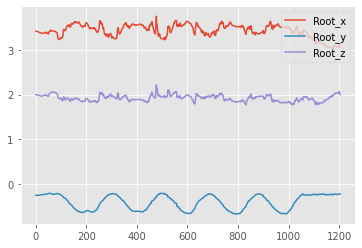

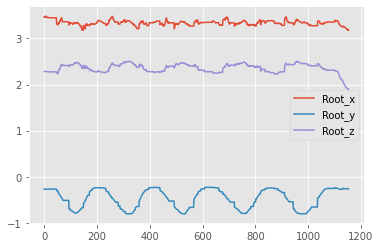

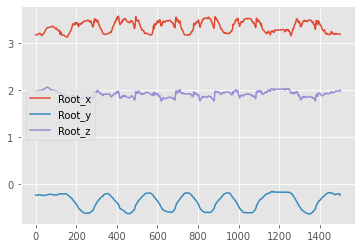

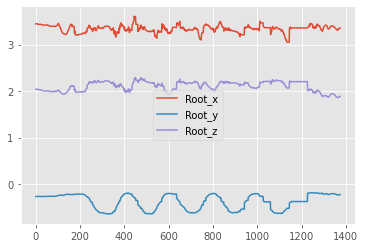

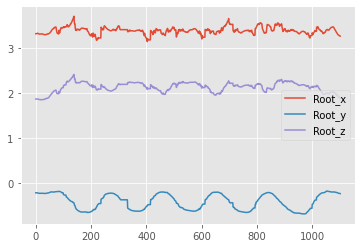

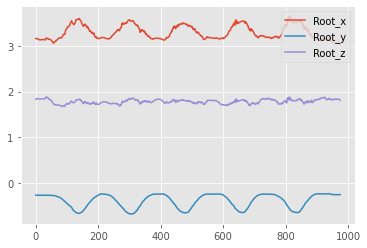

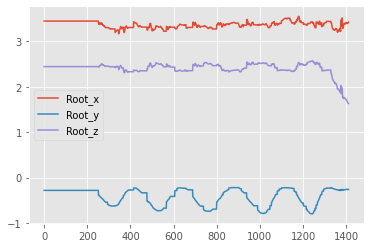

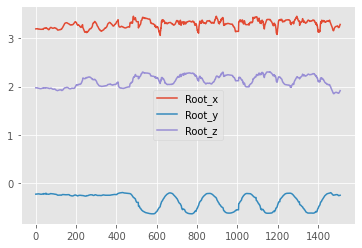

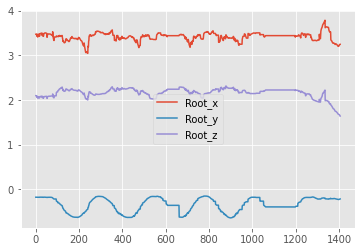

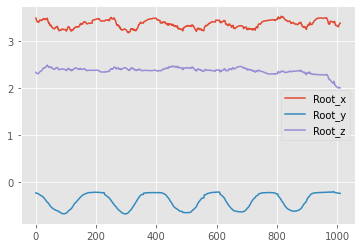

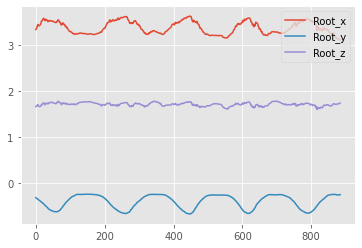

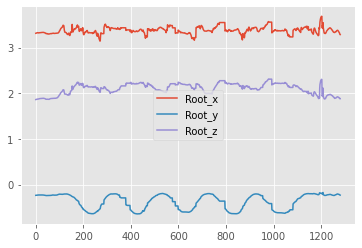

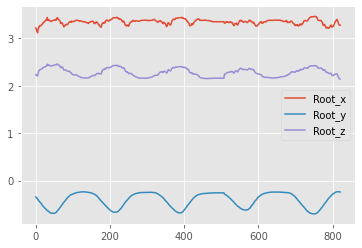

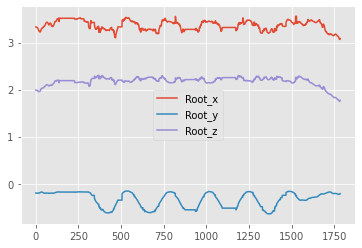

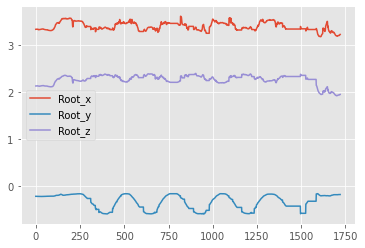

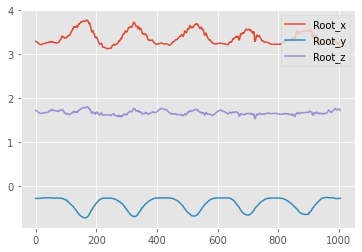

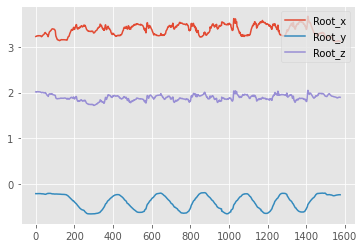

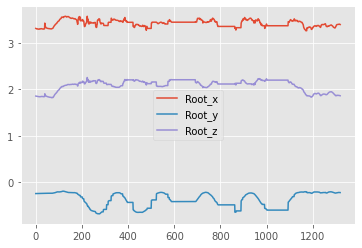

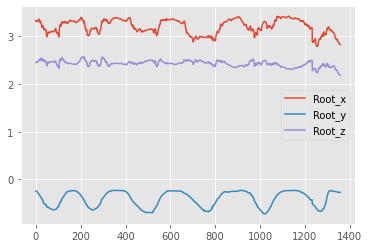

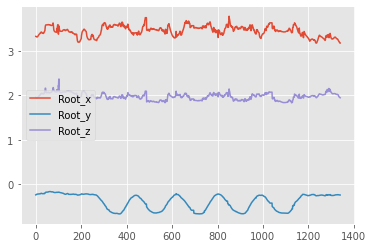

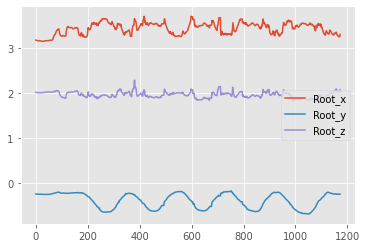

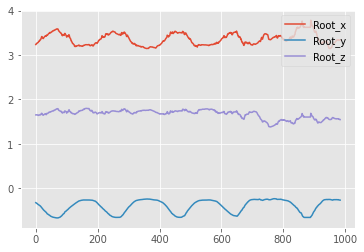

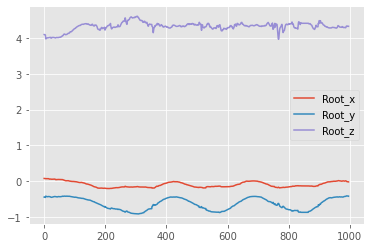

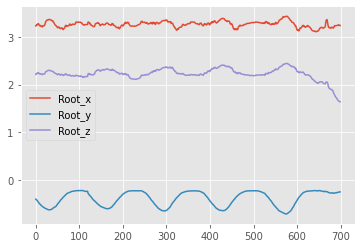

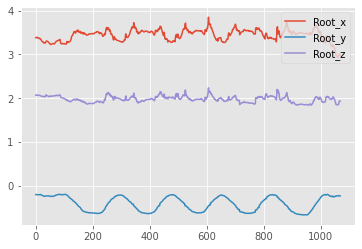

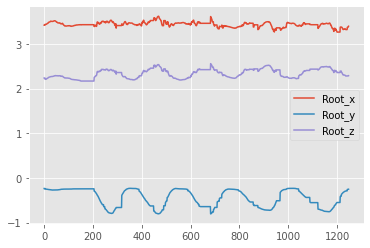

In [17]:
plt.style.use('ggplot')
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

csv_folder_path = CURRENT_DIR + '/data/csv'
files = glob.glob(csv_folder_path + '/*.csv')
print(files)

for file in files:
    data = pd.read_csv(file, encoding = 'UTF8')
    data_by_part = data.loc[:, 'Root_x':'Root_z'].copy()
    print(data_by_part)
    data_by_part.plot()